In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
from scipy.signal.windows import tukey
from matplotlib.gridspec import GridSpec
import pywt

### Read the data

In [2]:
with xr.open_dataset('../data/modified_dataset.nc') as dset:
    chunks = dset['chunk']
    species_labels = dset['species'].to_numpy()
    stations_labels = dset['station'].to_numpy()
    distances_labels = dset['distance'].to_numpy()

### Select the exmaples and define parameters

In [3]:
# indices of the modified dataset, selecting examples
indices = [38844,  2474, 57421, 12559, 57573, 21798, 10983, 12671]
# rabbit 38869
# hippo 54270
# leopard 58733
# guineafowl 4590


# some parameters
fs = 200 # sampling rate in Hz
times = chunks.time / fs # time axis in seconds
index_comp = 0 # index of the three-components to plot

#### Define parameters for CWT and show results

In [4]:
wavelet = 'cmor1-1.5'
wavelet = pywt.ContinuousWavelet(wavelet)
scales = np.arange(1, 128)

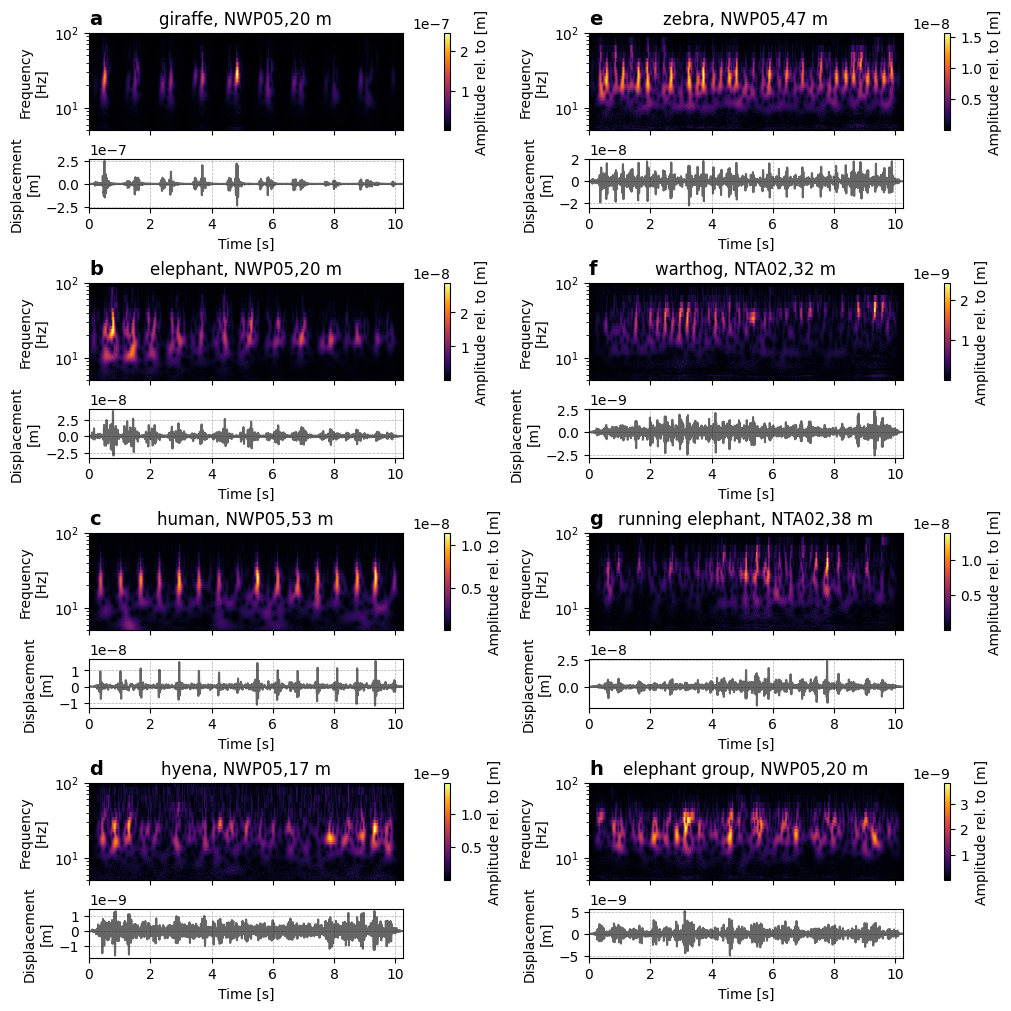

In [5]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)

# Define the grid specifications
gs = GridSpec(3*len(indices)//2, 4, width_ratios=[50, 1, 50, 1], figure=fig)

# Subplots
axes_scalograms = []
axes_waveform = []
cbar_axes = []

# Column 1
axes_scalograms.append(fig.add_subplot(gs[0:2, 0]))
axes_waveform.append(fig.add_subplot(gs[2, 0]))
axes_scalograms.append(fig.add_subplot(gs[3:5, 0]))
axes_waveform.append(fig.add_subplot(gs[5, 0]))
axes_scalograms.append(fig.add_subplot(gs[6:8, 0]))
axes_waveform.append(fig.add_subplot(gs[8, 0]))
axes_scalograms.append(fig.add_subplot(gs[9:11, 0]))
axes_waveform.append(fig.add_subplot(gs[11, 0]))

# Column 2
axes_scalograms.append(fig.add_subplot(gs[0:2, 2]))
axes_waveform.append(fig.add_subplot(gs[2, 2]))
axes_scalograms.append(fig.add_subplot(gs[3:5, 2]))
axes_waveform.append(fig.add_subplot(gs[5, 2]))
axes_scalograms.append(fig.add_subplot(gs[6:8, 2]))
axes_waveform.append(fig.add_subplot(gs[8, 2]))
axes_scalograms.append(fig.add_subplot(gs[9:11, 2]))
axes_waveform.append(fig.add_subplot(gs[11, 2]))

# add a colorbar to each scalogram in both columns
cbar_axes.append(fig.add_subplot(gs[0:2, 1]))
cbar_axes.append(fig.add_subplot(gs[3:5, 1]))
cbar_axes.append(fig.add_subplot(gs[6:8, 1]))
cbar_axes.append(fig.add_subplot(gs[9:11, 1]))
cbar_axes.append(fig.add_subplot(gs[0:2, 3]))
cbar_axes.append(fig.add_subplot(gs[3:5, 3]))
cbar_axes.append(fig.add_subplot(gs[6:8, 3]))
cbar_axes.append(fig.add_subplot(gs[9:11, 3]))

# Plot the scalograms and waveforms
for i, index_database in enumerate(indices):

    # continuous wavelet transform CWT
    waveform = chunks[index_database][index_comp] * tukey(2048, 0.1)
    cwtmatr, freqs = pywt.cwt(waveform, scales, wavelet, sampling_period=1/fs)
    cwtmatr = np.abs(cwtmatr)

    # plot the scalogram
    img = axes_scalograms[i].pcolormesh(times, freqs, cwtmatr, shading='auto', cmap='inferno')
    if i == 6:
        axes_scalograms[i].set_title('running %s, %s,%d m' % (species_labels[index_database], stations_labels[index_database], distances_labels[index_database]))
    elif i == 7:
        axes_scalograms[i].set_title('%s group, %s,%d m' % (species_labels[index_database], stations_labels[index_database], distances_labels[index_database]))
    else:
        axes_scalograms[i].set_title('%s, %s,%d m' % (species_labels[index_database], stations_labels[index_database], distances_labels[index_database]))
    axes_scalograms[i].set_ylabel('Frequency\n[Hz]')
    axes_scalograms[i].set_ylim(5, 100)
    axes_scalograms[i].set_xlim(np.min(times), np.max(times))
    axes_scalograms[i].set_xticklabels([])
    axes_scalograms[i].set_yscale('log')
    axes_scalograms[i].set_title(chr(97+i), fontsize=14, weight='bold', loc='left')

    # add a colorbar to each scalogram
    cbar = plt.colorbar(img, cax=cbar_axes[i])
    cbar.set_label('Amplitude rel. to [m]')

    # plot the waveform
    axes_waveform[i].plot(times, waveform, 'k', alpha=0.6)
    axes_waveform[i].set_xlim(np.min(times), np.max(times))
    axes_waveform[i].set_xlabel('Time [s]')
    axes_waveform[i].set_ylabel('Displacement\n[m]')
    axes_waveform[i].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

### Show examples related to path and site effect

In [7]:
indices = [19775,  1070, 50131] # indices of the modified dataset

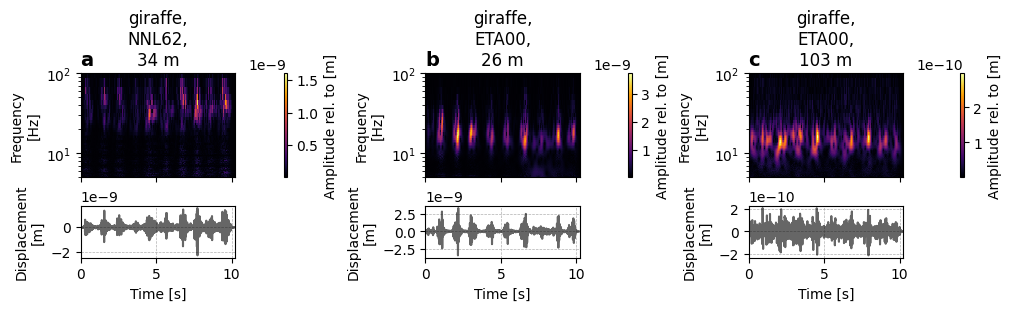

In [8]:
fig = plt.figure(figsize=(10, 3), constrained_layout=True)

# Define the grid specifications
gs = GridSpec(3, 6, width_ratios=[50, 1, 50, 1, 50, 1], figure=fig)

# Subplots
axes_scalograms = []
axes_waveform = []
cbar_axes = []

# Column 1
axes_scalograms.append(fig.add_subplot(gs[:2, 0]))
axes_waveform.append(fig.add_subplot(gs[2, 0]))
axes_scalograms.append(fig.add_subplot(gs[:2, 2]))
axes_waveform.append(fig.add_subplot(gs[2, 2]))
axes_scalograms.append(fig.add_subplot(gs[:2, 4]))
axes_waveform.append(fig.add_subplot(gs[2, 4]))

# add a colorbar to each scalogram in both columns
cbar_axes.append(fig.add_subplot(gs[:2, 1]))
cbar_axes.append(fig.add_subplot(gs[:2, 3]))
cbar_axes.append(fig.add_subplot(gs[:2, 5]))

for i, index_database in enumerate(indices):

    # continuous wavelet transform CWT
    waveform = chunks[index_database][index_comp] * tukey(2048, 0.1)
    cwtmatr, freqs = pywt.cwt(waveform, scales, wavelet, sampling_period=1/fs)
    cwtmatr = np.abs(cwtmatr)

    # plot the scalogram
    img = axes_scalograms[i].pcolormesh(times, freqs, cwtmatr, shading='auto', cmap='inferno')
    axes_scalograms[i].set_title('%s,\n%s,\n%d m' % (species_labels[index_database], stations_labels[index_database], distances_labels[index_database]))
    axes_scalograms[i].set_ylabel('Frequency\n[Hz]')
    axes_scalograms[i].set_ylim(5, 100)
    axes_scalograms[i].set_xlim(np.min(times), np.max(times))
    axes_scalograms[i].set_xticklabels([])
    axes_scalograms[i].set_yscale('log')
    axes_scalograms[i].set_title(chr(97+i), fontsize=14, weight='bold', loc='left')

    # add a colorbar to each scalogram
    cbar = plt.colorbar(img, cax=cbar_axes[i])
    cbar.set_label('Amplitude rel. to [m]')

    # plot the waveform
    axes_waveform[i].plot(times, waveform, 'k', alpha=0.6)
    axes_waveform[i].set_xlim(np.min(times), np.max(times))
    axes_waveform[i].set_xlabel('Time [s]')
    axes_waveform[i].set_ylabel('Displacement\n[m]')
    axes_waveform[i].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()